# Assignment: Data Wrangling and Exploratory Data Analysis
## Do Q1 and Q2, and one other question.

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
        
  This paper is about the importance of tidying data for ease of manipulation, visualization, and modeling, and will outline a specific framework for tidying.


  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  Tidy data standard is meant to facilitate the beginning stages of exploration and analysis and make the development of data analysis tools simple and compatible with each other.


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  The first sentence is touching on the fact that every data set has the same goal in mind, tidyness that meets a certain standard, but the starting point prior to the tidyness is different for each set.
  
  The second sentence states that although it isn't hard to define the observations and variables for a specific dataset, it's hard to define a definition for the two terms that apply to all data sets because the distinction between observations and variables can vary depending on the context and the type of data being analyzed.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  He defines a variable as something that contains all values that have the same underlying attribute, values as numbers or strings, and observations as something that contains all the values measured on the same unit across all attributes.


  5. How is "Tidy Data" defined in section 2.3?

  Data is considered tidy if each variable forms a column, each observation forms a row, and each observational unit forms a table.


  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  The 5 most common problems with messy datasets are that column headers are values, not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, or a single observational unit is stored in multiple tables.


  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  
  Table 11 is messy because there is a column for every day of the month. 12 is not messy because it condensed the dates into one column, but is considered molten because the element column contained names of variables rather than values.

  
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  The chicken and egg problem is that you can't have tidy tools without tidy data, but you also can't have tidy data without tidy tools. Wickham hopes that people will not only build on this current framework to find better data storage strategies and tools, but develop new frameworks to make the data wrangling tasks easier.

**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [2]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt

In [3]:
#Q2.1
! git clone https://www.github.com/DS3001/assignment2
adf = pd.read_csv('./assignment2/data/airbnb_hw.csv',low_memory=False) #asked chat gpt for encoding

#Find out if there are missing data
missing_values = adf['Price'].isnull()  # or df['column_name'].isna()
num_missing = missing_values.sum()
#print(num_missing) #There are 0 missing data, so no need for a dummy variable marking where data was missing

#I replaced commas with '' in order to allow for the coersion of data type to integers
adf['Price'] = adf['Price'].str.replace(',', '')

#check the current data types
#unique_data_types = adf['Price'].apply(type).unique()
#print(unique_data_types)

#I coerced the current string variables to integers to allow for easy numeric manipulation later
adf['Price'] = pd.to_numeric(adf['Price'], errors='coerce')

#adf['Price'].unique().tolist()
#print(adf['Price'].value_counts())

fatal: destination path 'assignment2' already exists and is not an empty directory.


In [ ]:
#Q2.2
! git clone https://www.github.com/DS3001/wrangling
df = pd.read_csv('./wrangling/data/sharks.csv',low_memory=False)

#Created a missing variable dummy
df['Type'+'_nan'] = df['Type'].isnull() # Equals 1 if missing, 0 if non-null

df['Type'].fillna('Unprovoked', inplace=True) #fill the empty values with 'Unprovoked'
#I made this decision because the majority of types of shark attacks are 'Unprovoked', and there aren't many empty values, so it wouldn't have much of an effect on the overall trends.

def update_type(value): #the values that are 'Unprovoked' or 'Provoked' will stay the same, but all other values will change to 'Unprovoked'
    if value in ['Provoked', 'Unprovoked']:
        return value
    else:
        return 'Unprovoked'

df['Type'] = df['Type'].apply(update_type)
#I made this decision because the majority of values outside of 'Provoked' or 'Unprovoked' were boating incidents or invalid, and those would mostly count as unprovoked.

def type_num(value): #0 means the shark attack was unprovoked, 1 means it was provoked
    if value in['Provoked']:
      return 1;
    else:
      return 0;

df['Type'] = df['Type'].apply(type_num)
#I made this decision because when handling the data later it'll be easier to work with numbers rather than strings.

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [ ]:
#Q2.3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df2 = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the .csv file for you



In [ ]:
#Q2.3 continued

#Created a missing variable dummy
df2['Type'+'_nan'] = df['Type'].isnull() # Equals 1 if missing, 0 if non-null

#fill the empty values with 0
df2['WhetherDefendantWasReleasedPretrial'].fillna(0, inplace=True) #I made this decision because when entering the data, if it was 0 they probably didn't feel the need to mark it down

#the values that are 0 or 1 will stay the same, but all other values will change to 0
def num_update (value):
    if value in [0, 1]:
        return value
    else:
        return 0
df2['WhetherDefendantWasReleasedPretrial'] = df2['WhetherDefendantWasReleasedPretrial'].apply(num_update) #I made this decision because the non 0 or 1 values were 9s, and 9s were most likely typos for 0

In [ ]:
#Q2.4

#Created a missing variable dummy
df2['ImposedSentenceAllChargeInContactEvent'+'_nan'] = df2['ImposedSentenceAllChargeInContactEvent'].str.strip() == '' # Equals 1 if missing, 0 if non-null

#Check the unique values we're working with to see if there are missing ones
df2['ImposedSentenceAllChargeInContactEvent'].unique().tolist()
print(df2['ImposedSentenceAllChargeInContactEvent'].value_counts())

#original number of empty values (stripped them of whitespaces)
#empty_count = (df2['ImposedSentenceAllChargeInContactEvent'].str.strip() == '').sum()
#print(empty_count)

#replace all empty values with nan
df2['ImposedSentenceAllChargeInContactEvent'].replace('', pd.NA, inplace=True)

#If they were on probation/no incarceration AND there is a missing value then turn it into a 0
#Otherwise keep it nan
def replace_missing_with_zero(df2):
    def custom_replace(row):
        if pd.isna(row['ImposedSentenceAllChargeInContactEvent']):
            if row['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0:
                return 0
        return row['ImposedSentenceAllChargeInContactEvent']

    df2['ImposedSentenceAllChargeInContactEvent'] = df2.apply(custom_replace, axis=1)
    return df2

#run the function
replace_missing_with_zero(df2)

#number of null values after replacing them with 0 if they are on probation/not incarcerated
#empty_count2 = df2['ImposedSentenceAllChargeInContactEvent'].isnull().sum()
#print(empty_count2)


**Q3.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Notice that your graph is "bi-modal", having two little peaks that represent locally most common values. Now group your graph by `level` and `control`. What explains the bi-modal nature of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

                     control   level
0                     Public  4-year
1                     Public  4-year
2     Private not-for-profit  4-year
3                     Public  4-year
4                     Public  4-year
...                      ...     ...
3793  Private not-for-profit  4-year
3794  Private not-for-profit  4-year
3795      Private for-profit  4-year
3796      Private for-profit  2-year
3797      Private for-profit  4-year

[3798 rows x 2 columns]


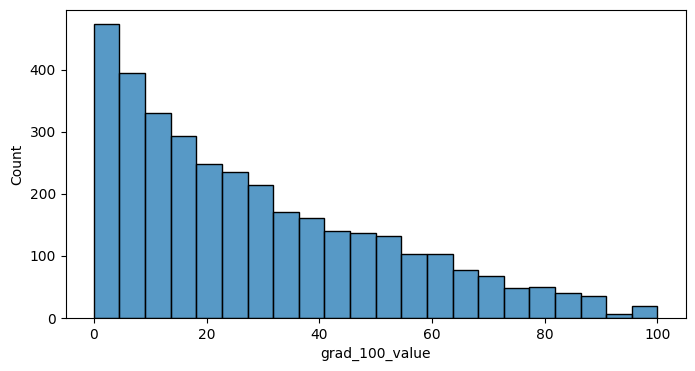

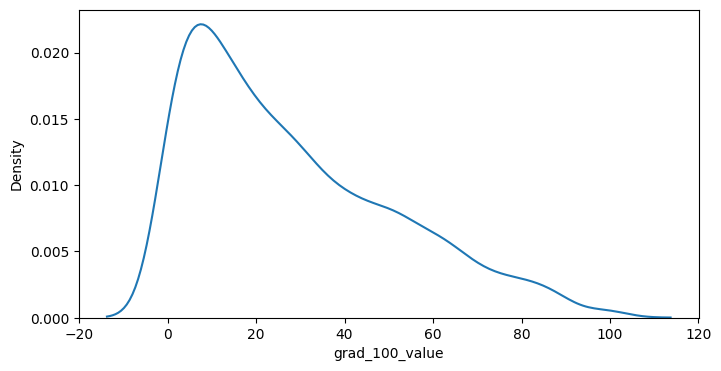

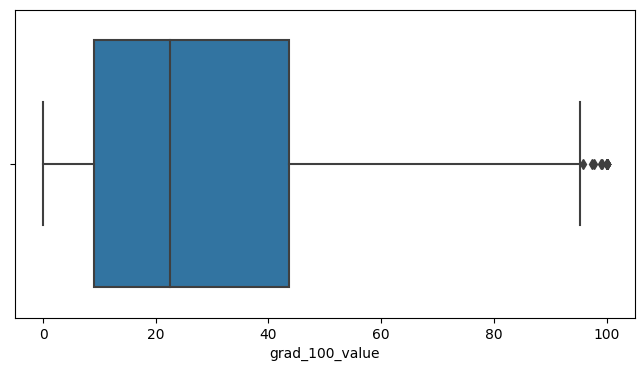

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


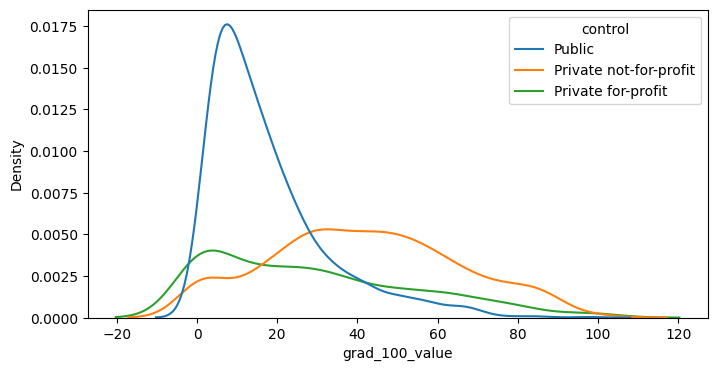

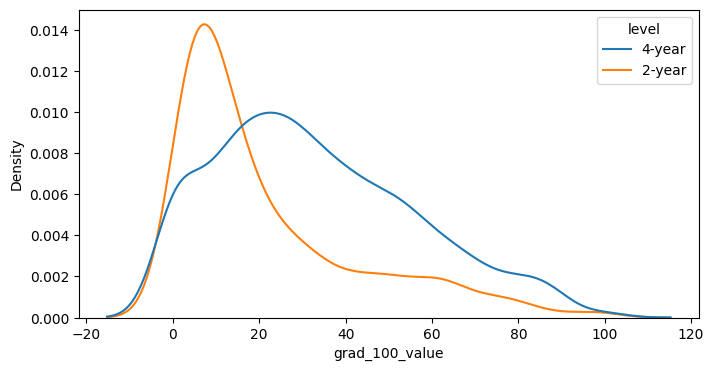

                                count       mean        std  min     25%  \
level  control                                                             
2-year Private for-profit       461.0  37.197614  25.497380  0.0  15.800   
       Private not-for-profit    68.0  41.913235  28.348302  0.0  16.225   
       Public                   926.0  12.400000  10.893600  0.0   5.100   
4-year Private for-profit       318.0  17.382704  20.788525  0.0   0.000   
       Private not-for-profit  1121.0  41.645674  23.243453  0.0  25.000   
       Public                   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
level  control                                      
2-year Private for-profit      33.9  57.800  100.0  
       Private not-for-profit  44.4  61.200  100.0  
       Public                   9.4  16.175   97.8  
4-year Private for-profit      12.5  26.325  100.0  
       Private not-for-profit  41.0  57.800  100.0  
       Public       

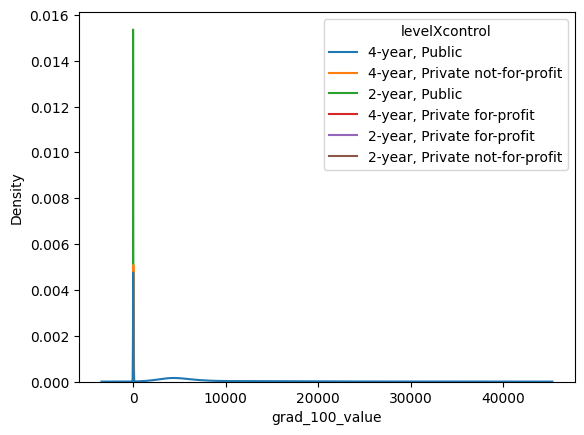

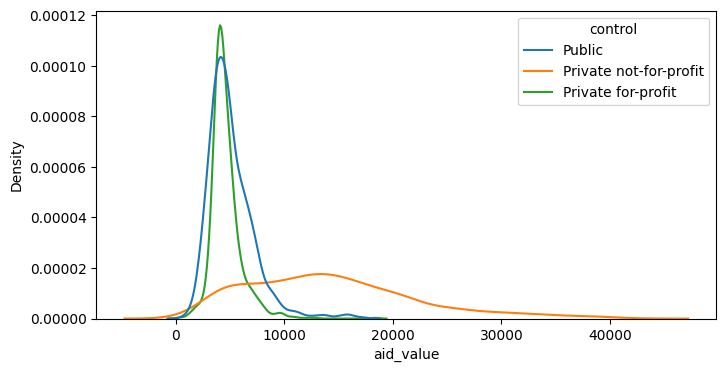

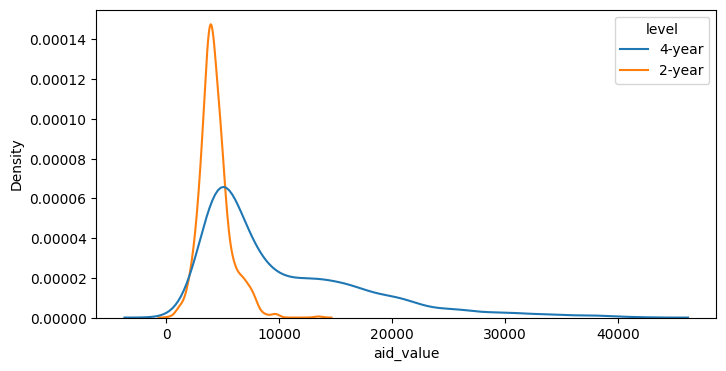

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

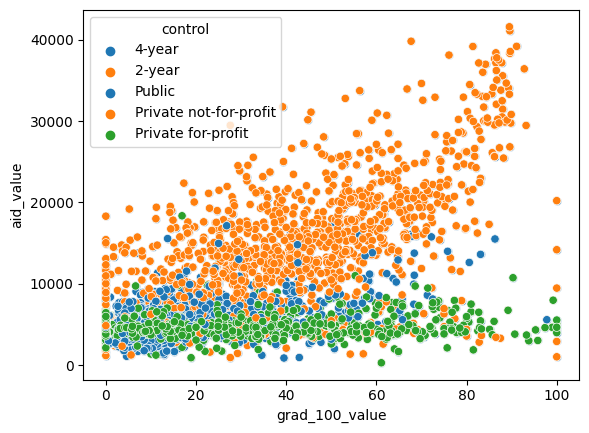

In [ ]:
#Q3

#Q3.1
#read in the data
cdf = pd.read_csv('./assignment2/data/college_completion.csv',low_memory=False)

#Q3.2
cdf.head()
#The dimensions of the data are 5x63 meaning there are 5 observations and 63 variables included

#Q3.3
#cross tabulate control and level variables
print(cdf.loc[:,('control','level')])
#I'm noticing that the majority of private institutions are 4-year, and the majority of public are 2-year
#The 2-year privates tend to be not-for-profit

#Q3.4
#histogram, kernel density plot, boxplot, and statistical description of grad_100_value
plt.figure(figsize=(8, 4))
sns.histplot(cdf['grad_100_value'])
plt.figure(figsize=(8, 4))
sns.kdeplot(cdf['grad_100_value'])
plt.figure(figsize=(8, 4))
sns.boxplot(data=cdf, x='grad_100_value')
plt.show()
grouped_stats = cdf['grad_100_value'].describe()
print(grouped_stats)

#Q3.5
plt.figure(figsize=(8, 4))
sns.kdeplot(data=cdf, x='grad_100_value', hue='control')
#Based on the graph, the majority of public schools only have 20% of their students completing their degree within 100% of expected time, whereas the private schools seem to have a wider spread of percentages of people finishing at different % of the 100% expected time.
plt.figure(figsize=(8, 4))
sns.kdeplot(data=cdf, x='grad_100_value', hue='level')
#Based on the graph the majority of 2 year schools only have 0-20% of their students graduating within 100% of expected time, whereas 4-year schools have a greater % of their students graduating within the 100% of expected time.
plt.show()
grouped_stats1 = cdf.groupby(['level', 'control'])['grad_100_value'].describe()
print(grouped_stats1)
#Private not for profit 2-year schools appear to have the best graduation rates because of their high means, 50%, and 75% values.

#Q3.6
cdf['levelXcontrol']=cdf['level']+', '+cdf['control']
sns.kdeplot(data=cdf, x='grad_100_value', hue='levelXcontrol')
#The 4 year not for profit schools appear to have the best graduation rates here because it follows the same pattern as the 2 year private not for profit and for profit schools yet at a greater density towards the center 25-50% range and having similar means.

#Q3.7
sns.kdeplot(cdf['aid_value'])
plt.figure(figsize=(8, 4))
sns.kdeplot(data=cdf, x='aid_value', hue='control')
plt.figure(figsize=(8, 4))
sns.kdeplot(data=cdf, x='aid_value', hue='level')
grouped_stats3 = cdf.groupby(['level', 'control'])['grad_100_value'].describe()
print(grouped_stats3)
plt.show()
#the difference in the aid value densities could be due to the large difference of the amount of aid given to students in private not-for-profit schools and public/private for-profit schools.

#Q3.8
sns.scatterplot(data = cdf, x = 'grad_100_value', y = 'aid_value')

sns.scatterplot(data = cdf, x = 'grad_100_value', y = 'aid_value', hue = 'level')
sns.scatterplot(data = cdf, x = 'grad_100_value', y = 'aid_value', hue = 'control')
#For private not-for-profits, the more aid the greater the graduation rate
#For 4-year schools, the more aid, the greater the graduation rate

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_NYC.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q5.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

**Q6.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

In [7]:
#Playing in class
! git clone https://www.github.com/DS3001/assignment2
adf = pd.read_csv('./assignment2/data/airbnb_hw.csv',low_memory=False) #asked chat gpt for encoding



fatal: destination path 'assignment2' already exists and is not an empty directory.


In [12]:
adf.head()
y = adf['Price']
temp = adf['Price']
temp = temp.str.replace(',','')
temp = pd.to_numeric(temp, errors = 'coerce')
temp.describe()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

In [20]:
vars = ['Beds', 'Property Type']
adf['Beds'].describe()
adf['Beds_nan'] = adf['Beds'].isnull()
pd.crosstab(adf['Beds_nan'], adf['Property Type'])

gdf = adf.loc[adf['Beds_nan']==0, :]
print(gdf.shape)
print(gdf['Beds'].describe())

gdf = adf.loc[adf['Property Type'].isnull()==0, :]
adf['Property Type'].describe

(30393, 14)
count    30393.000000
mean         1.530089
std          1.015359
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: Beds, dtype: float64


<bound method NDFrame.describe of 0        Apartment
1        Apartment
2        Apartment
3        Apartment
4        Apartment
           ...    
30473    Apartment
30474    Apartment
30475        Other
30476    Apartment
30477        House
Name: Property Type, Length: 30478, dtype: object>

In [14]:
adf.shape

(30478, 13)